In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 22 - Determining the number of clusters

We will look at two methods for determining the number of clusters, using the penguin dataset from Labs 3 and 21.

### Section 1: Loading, cleaning, and scaling the data

This section is a subset of Sections 1 and 4 of Lab 21.

We will use the Palmer penguin data set, which contains information about three species of penguins found in the Palmer Archipelago in Antarctica.

The CSV file can be downloaded from https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv or it can be accessed directly through the Seaborn library using the following command. This second option only works for new versions of Seaborn, and may not work if using Jupyter Hub on Lehman 360 (in which case use the link for the CSV file above)

Load the penguin data set into the variable penguins

In [16]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Drop the rows with missing data.

In [17]:
penguins = penguins.dropna(how="any")

For future reference, plot scatterplots of all pairs of quantitative variables, colored by the species of penguin. 

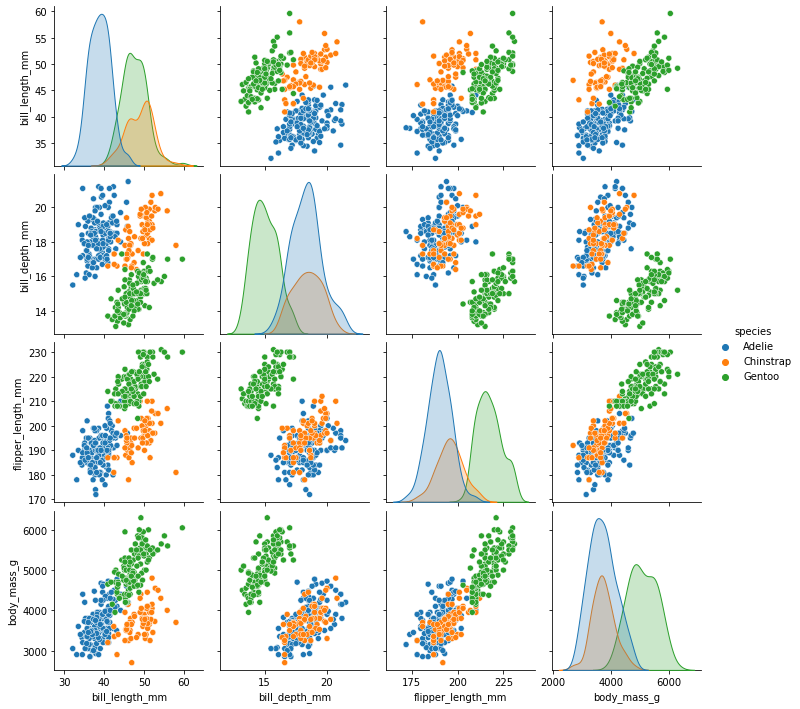

In [18]:
sns.pairplot(data=penguins, hue= "species")

Remember in Lab 21 we got better results by scaling the quantitative columns to all have values between 0 and 1.  We will do that again here.

First, create a new DataFrame `x` with only the quantitative columns in it.

In [19]:
x = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

Next, create a MinMaxScaler object (variable), and use it to scale the columns of x.

In [20]:
scaler = MinMaxScaler()

In [21]:
x_scaled = scaler.fit_transform(x)

## Section 2: Inertia and the elbow method

The first method, called the *elbow method*, asumes you have centers for the clusters, as in k-means clustering. It computes the sum of the squared distances of samples to their closest cluster center.

Run the K-Means clustering algorithm with k = 3 clusters on the scaled data from Section 1, and store the assigned clusters in a variable called `clusters`.

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<details><summary>Answer:</summary>
<code>
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)
clusters
</code>
</details>

We can compute the sum of the squared distance of the samples to their closest cluster center as follows (`kmeans` should be the variable holding information about the k-means clustering algorithm).

In [26]:
kmeans.inertia_

18.25075905048071

To find the best k value, we make a loop to compute the inertia for each k, storing the result in a list.

In [27]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

Plot the values in inertia_list.  You can use `range(1,11)` as the x values.

Text(0, 0.5, 'Inertia')

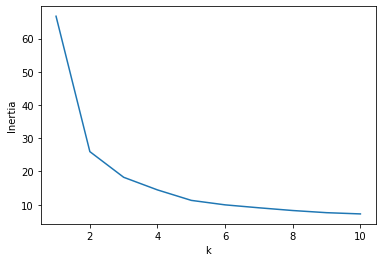

In [28]:
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

<details><summary>Answer:</summary>
<code>
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")
</code>
</details>

The elbow method tells us to look for where the curve straightens into a line, and that point is the suggested number of clusters.  We choose this point to avoid underfitting (ex. a larger k will give us a significantly smaller inertia) and overfitting (ex. the more clusters there are, the less variation in each cluster and the smaller the inertia but these different clusters might not be meaningful).

In this example, someone could probably make the case for the elbow being at k = 2, k = 3, or k =5. In the next section, we will look at another method for determining the number of clusters.

### Section 3: Silhouette score

Instead of computing the inertia, which requires a cluster center, we can compute the silhouette score.  

First the Silhouette Coefficient is calculated for each data point.  If a is the mean distance from that point to all other points in its cluster and if b is the mean distance to all other points in the nearest cluster that the point is not part of, then the Silhouette Coefficient for a data point is 
$$\frac{b - a}{\max\{a,b\}}$$

The Silhouette Score is the mean silhouette coefficient for all data points.

Let's compute the silhouette score for the penguin data with k = 3.

In [29]:
silhouette_score(x_scaled,clusters)

0.2809413484041337

We should choose the k with the largest silhouette score.  We can again perform clustering for different k's using a loop, and compute the silhouette score for each.  Can you figure out how to modify the loop above to work for the silhouette scores?  You will need to start the loop at k=2.

In [30]:
silhouette_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    score = silhouette_score(x_scaled,clusters)
    silhouette_list.append(score)

<details><summary>Answer:</summary>
<code>
silhouette_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    score = silhouette_score(x_scaled,clusters)
    silhouette_list.append(score)
</code>
</details>

Plot the silhouette scores:

Text(0, 0.5, 'Silhouette Score')

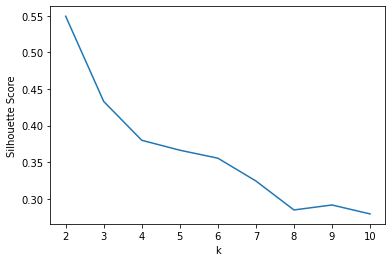

In [31]:
plt.plot(range(2,11), silhouette_list)
plt.xlabel("k")
plt.ylabel("Silhouette Score")

<details><summary>Answer:</summary>
<code>
plt.plot(range(2,11), silhouette_list)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
</code>
</details>

This plot suggests k = 2 is the ideal number of clusters. Remember k = 2 was also where the sharpest bend was in the elbow method plot.

### Section 4: Clustering the penguin data with k = 2

Let's cluster the penguin data with k = 2 to see why this is suggested (even though we know the correct answer is k = 3).  First perform the clustering.

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)

Next, add the clusters to the penguin DataFrame in a new column.

In [33]:
penguins['clusters'] = clusters

Finally, plot the scatterplots for all pairs of quantitative columns, colored by the 2 clusters we just found.

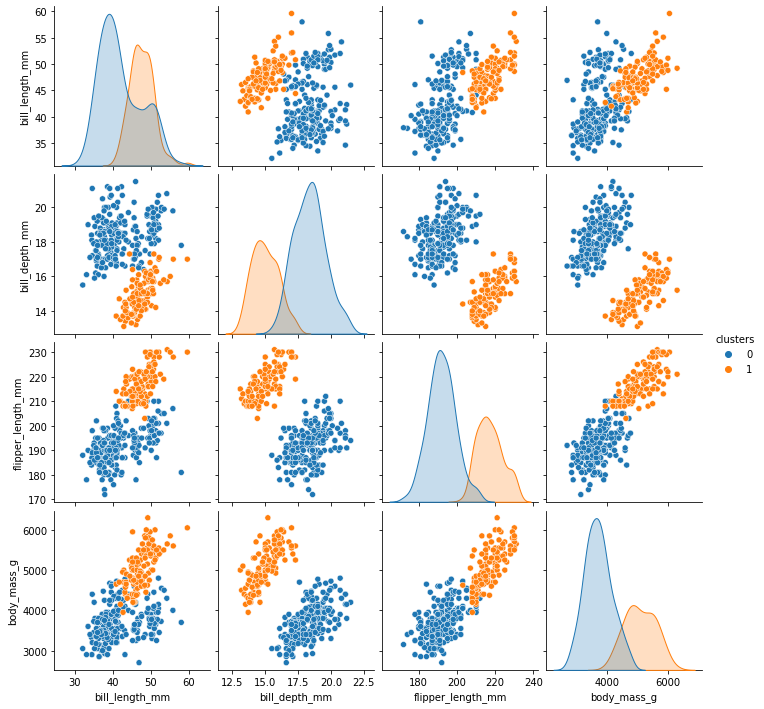

In [41]:
sns.pairplot(data=penguins, hue='clusters')

From the scatter plots, why do you think the elbow methods suggest k = 2 as the ideal number of clusters?

### Section 5: Simulated data

Let's use some simulated data to better understand why and when the elbow method and silhouette score work.

In [39]:
# number of clusters to make
true_k = 4

# Create true_k clusters, made up of 100 data points total.
# x_blobs holds the 2 dimensional coordinates of each simulated data point and
# y_blobs holds the true cluster number of that data point
x_blobs, y_blobs = make_blobs(n_samples = 100, centers = true_k)

# Create a DataFrame of the points and which cluster they belong to.
df = pd.DataFrame(x_blobs, columns = ["x_coord", "y_coord"])
df["cluster"] = y_blobs

Plot a scatterplot of the simulated data points, colored by their cluster.  You can read the code above or display the DataFrame `df` to see the column names.  (You can also add this code in the cell above to make it easier to re-run the simulation and plot.)

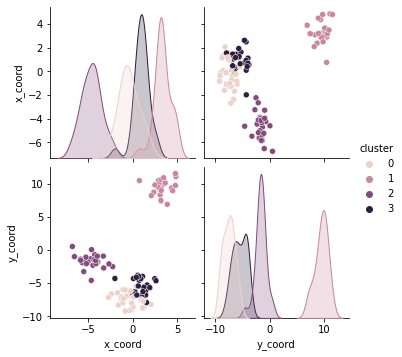

In [40]:
sns.pairplot(df, hue="cluster")

Each simulated cluster is a different color.  If the points were all the same color, how many clusters would you think there are?

Re-run the code several times.  What kind of variation is there?

Use a loop to run the k-means clustering algorithm for k from 1 to 10.  Compute the inertia for each clustering and store them in a list.

<details><summary>Answer:</summary>
<code>
inertias = []
for k in range(1,11):
    kmeans_blobs = KMeans(n_clusters = k)
    kmeans_blobs.fit(x_blobs)
    inertias.append(kmeans_blobs.inertia_)
</code>
</details>

Plot a line plot of the inertias.

<details><summary>Answer:</summary>
<code>
plt.plot(range(1,11), inertias)
plt.xlabel("k")
plt.ylabel("Inertia")
</code>
</details>

Which k is the elbow at?  Does this match the number of simulated clusters?  Why or why not?  

Try re-running the simulation code, loop, and plot several times.  Does the elbow always appear at the true k?  Why or why not?

Next, write a loop to run the k-means clustering algorithm for k from 2 to 10. Compute the silhouette score for each clustering and store them in a list.

<details><summary>Answer:</summary>
<code>
scores = []
for k in range(2,11):
    kmeans_blobs = KMeans(n_clusters = k)
    kmeans_blobs.fit(x_blobs)
    cluster_blobs = kmeans_blobs.predict(x_blobs)
    score = silhouette_score(x_blobs,cluster_blobs)
    scores.append(score)
</code>
</details>

Plot a line plot of the silhouette scores

<details><summary>Answer:</summary>
<code>
plt.plot(range(2,11), scores)
plt.xlabel("k")
plt.ylabel("Silhouette score")
</code>
</details>

Which k is the largest?  Does this match the number of simulated clusters?  Why or why not?  

Try re-running the simulation code, loop, and plot several times.  Does the elbow always appear at the true k?  Why or why not?  How does it compare to the k found with the elbow method?